In [1]:
import pandas as pd
import numpy as np
from scipy.io import arff
from matplotlib import pyplot as plt

In [2]:
training_arff, meta = arff.loadarff('./datasets/bank-training.arff')
testing_arff, meta2 = arff.loadarff('./datasets/bank-NewCustomers.arff')

training_df = pd.DataFrame(training_arff)
testing_df = pd.DataFrame(testing_arff)

In [3]:
def clean_df(df):
  # decode str values
  cols = list(df.columns)
  for col in cols:
    try:
      df[col] = df[col].str.decode('utf-8')
    except:
      df[col] = pd.to_numeric(df[col])
      pass
    try:
      df = df.replace({col: {'YES': True, 'NO': False}})
    except:
      pass
  # return pd.get_dummies(df)
  return df

training_df_dummy = clean_df(training_df)
testing_df_dummy = clean_df(testing_df)

In [6]:
def display_attribute(df, meta, col_name):
  pep = df.loc[df['pep'] == True]
  pep_col_name = []
  no_pep_col_name = []
  if meta.types()[meta.names().index(col_name)] == 'nominal':
    labels = get_labels(col_name)
    for label in labels:
      no_pep_col_name.append(len(df.loc[df[col_name] == label]))
      pep_col_name.append(len(pep.loc[pep[col_name] == label]))

  else:
    min_val = int(min(df[col_name]))
    max_val = int(max(df[col_name]))
    rg = max_val - min_val
    if rg < 12:
      labels = []
      for x in range(min_val, max_val + 1):
        no_pep_col_name.append(len(df.loc[df[col_name] == x]))
        pep_col_name.append(len(pep.loc[pep[col_name] == x]))
        labels.append(x)
    else:
      step = rg//7
      for x in range(min_val, max_val, step):
        print(x)
  plt.figure(dpi = 150)
  plt.bar(labels, no_pep_col_name, label = 'No PEP')
  plt.bar(labels, pep_col_name, label = 'Yes PEP')
  plt.legend()
  plt.title(f'{col_name} distribution')
  plt.show()
  
  
def get_labels(col_name):
  label = []
  x = meta.names().index(col_name) + 1
  values = (str(meta).split('\n')[x].split("range is ")[1].lstrip('(').rstrip(')').split(','))
  for value in values:
    label.append(value.strip().strip("''"))
  if label == ['NO', 'YES']:
    return [False, True]
  return label


In [55]:
def display_attribute(df, meta, col_name):
  pep = df.loc[df['pep'] == True]
  pep_col_name = []
  no_pep_col_name = []
  if meta.types()[meta.names().index(col_name)] == 'nominal':
    labels = get_labels(col_name)
    for label in labels:
      no_pep_col_name.append(len(df.loc[df[col_name] == label]))
      pep_col_name.append(len(pep.loc[pep[col_name] == label]))

  else:
    labels = []
    min_val = int(min(df[col_name]))
    max_val = int(max(df[col_name]))
    rg = max_val - min_val
    print(rg)
    if rg < 12:
      for x in range(min_val, max_val + 1):
        no_pep_col_name.append(len(df.loc[df[col_name] == x]))
        pep_col_name.append(len(pep.loc[pep[col_name] == x]))
        labels.append(x)
    else:
      for y in range(min_val, max_val, (rg//8)):
        no_pep_col_name.append(len(df.loc[df[col_name].between(y, y + (rg//8))]))
        pep_col_name.append(len(pep.loc[pep[col_name].between(y, y + (rg//8))]))
        labels.append(f"{y}-{y+(rg//8-1)}")
  plt.figure(dpi = 150)
  if type(labels[0]) != str:
    labels = [str(label) for label in labels]
  plt.bar(labels, no_pep_col_name, label = 'No PEP')
  plt.bar(labels, pep_col_name, label = 'Yes PEP')
  plt.legend()
  plt.title(f'{col_name} distribution')
  plt.show()
  
def get_labels(col_name):
  label = []
  x = meta.names().index(col_name) + 1
  values = (str(meta).split('\n')[x].split("range is ")[1].lstrip('(').rstrip(')').split(','))
  for value in values:
    label.append(value.strip().strip("''"))
  if label == ['NO', 'YES']:
    return [False, True]
  return label

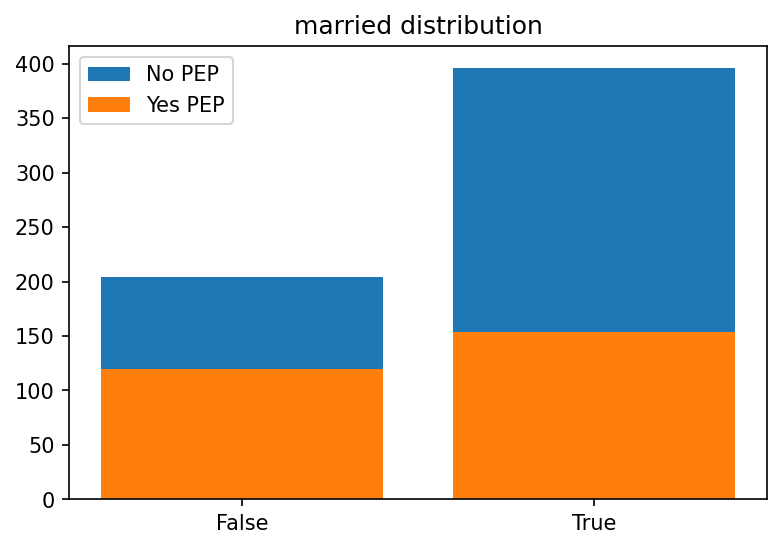

In [58]:
display_attribute(training_df_dummy, meta, 'married')
# get_labels('married')

In [19]:
training_df.head(10)

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48.0,b'FEMALE',b'INNER_CITY',17546.00,b'NO',1.0,b'NO',b'NO',b'NO',b'NO',b'YES'
1,40.0,b'MALE',b'TOWN',30085.10,b'YES',3.0,b'YES',b'NO',b'YES',b'YES',b'NO'
2,51.0,b'FEMALE',b'INNER_CITY',16575.40,b'YES',0.0,b'YES',b'YES',b'YES',b'NO',b'NO'
3,23.0,b'FEMALE',b'TOWN',20375.40,b'YES',3.0,b'NO',b'NO',b'YES',b'NO',b'NO'
4,57.0,b'FEMALE',b'RURAL',50576.30,b'YES',0.0,b'NO',b'YES',b'NO',b'NO',b'NO'
5,57.0,b'FEMALE',b'TOWN',37869.60,b'YES',2.0,b'NO',b'YES',b'YES',b'NO',b'YES'
6,22.0,b'MALE',b'RURAL',8877.07,b'NO',0.0,b'NO',b'NO',b'YES',b'NO',b'YES'
7,58.0,b'MALE',b'TOWN',24946.60,b'YES',0.0,b'YES',b'YES',b'YES',b'NO',b'NO'
8,37.0,b'FEMALE',b'SUBURBAN',25304.30,b'YES',2.0,b'YES',b'NO',b'NO',b'NO',b'NO'
9,54.0,b'MALE',b'TOWN',24212.10,b'YES',2.0,b'YES',b'YES',b'YES',b'NO',b'NO'
